In [2]:
# IMPORT STATEMENTS
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# IMPORT DATA
data = pd.read_csv('nba_player_game_logs.csv')
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x).rename(columns=lambda x: x.strip()) # remove whitespace
# data.info()
# data.columns

In [4]:
# GET DECEMBER DATA

start_date = '2021-12-01'
end_date = '2021-12-31'

east_teams = ['BKN', 'MIL', 'CHA', 'IND', 'CHI', 'DET', 'NYK', 'BOS', 'TOR', 'WAS', 'CLE', 'PHI', 'ORL', 'ATL', 'MIA']

december_data = data.loc[data['game_date'].between(start_date,  end_date)] # All game data values for December

# Select data by players who scored points at all and if there are in the East
december_and_east_data = december_data[(december_data['PTS'] > 0) & (december_data['TEAM'].isin(east_teams))] 

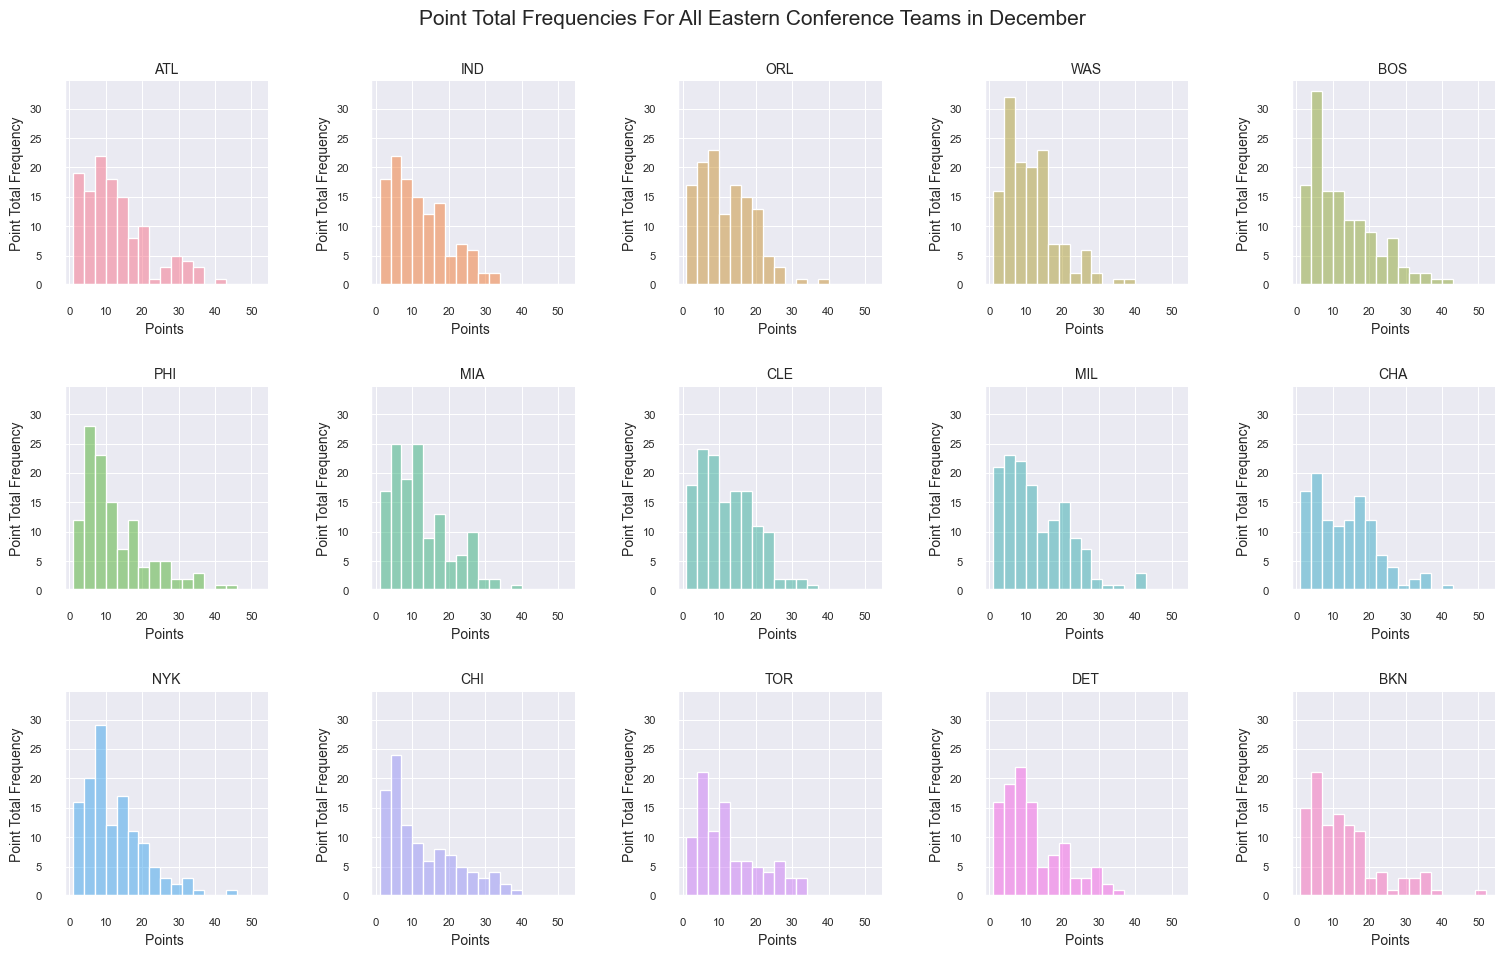

In [5]:
# CREATE VISUALIZATION 

sns.set_style("darkgrid") # darker background with grid

# Some fine-tuning elements of graphs
sns.set_context("poster", rc={"font.size": 5, "axes.labelsize": 10, "axes.titlesize": 10, "xtick.labelsize": 8, "ytick.labelsize": 8,
                              "grid.linewidth": 0.75})

# Create distribution plot histogram
point_data = sns.displot(
    december_and_east_data, x="PTS", col="TEAM", hue="TEAM", # binwidth=3 seems like a decent number for the distrubtions; hue=TEAM just for colors 
    binwidth=3, height=3, col_wrap=5, legend=False
)

# Adjust size of graphs
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Create title
plt.suptitle('Point Total Frequencies For All Eastern Conference Teams in December', y=1.05, fontsize=15)

# Set graph labels
point_data.set(xlabel='Points', ylabel='Point Total Frequency')
point_data.set_titles('{col_name}') # Each graph title set by team name

# Set graph labels for all graphs; just think it seems a bit more clear for each graph
for axis in point_data.axes.flat:
    axis.tick_params(labelleft=True, labelbottom=True)
    axis.set_xlabel('Points ', visible=True)
    axis.set_ylabel('Point Total Frequency', visible=True)
    